In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats 

In [2]:
df_games=pd.read_csv('games.csv')

<Axes: >

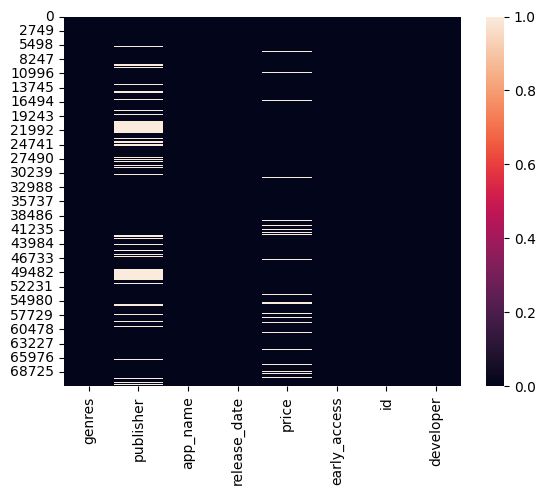

In [61]:
# mapa de calor de valores nulos (este mapa de calor ya tiene los nulos eliminados, de publisher y price no me ocupe 
# por el momento , xq no habian requerimientos)
sns.heatmap(df_games.isnull())


In [4]:
#no me sirve
df_games= df_games.drop(['specs','reviews_url'],axis=1)
df_games

,genres,publisher,app_name,release_date,price,early_access,id,developer
0,Action,WTFOMGames,! That Bastard Is Trying To Steal Our Gold !,2016-03-01,3.99,False,449940.0,WTFOMGames
1,Adventure,WTFOMGames,! That Bastard Is Trying To Steal Our Gold !,2016-03-01,3.99,False,449940.0,WTFOMGames
2,Casual,WTFOMGames,! That Bastard Is Trying To Steal Our Gold !,2016-03-01,3.99,False,449940.0,WTFOMGames
3,Indie,WTFOMGames,! That Bastard Is Trying To Steal Our Gold !,2016-03-01,3.99,False,449940.0,WTFOMGames
4,Action,NaN,"""Barely Attuned Magic Thingy"" Staff",2014-06-19,NaN,False,308163.0,Wild Shadow Studios
...,...,...,...,...,...,...,...,...
71460,Indie,Fancy Fish Games,＜/reality＞,2017-04-18,11.99,False,562280.0,Fancy Fish Games
71461,Adventure,NaN,＜/reality＞ Original Soundtrack,2017-04-18,3.99,False,626850.0,Fancy Fish Games
71462,Indie,NaN,＜/reality＞ Original Soundtrack,2017-04-18,3.99,False,626850.0,Fancy Fish Games
71463,Casual,Jeroen Wimmers,🔴 Circles,2017-02-17,8.99,False,460250.0,Jeroen Wimmers


In [40]:
df = df_games[['genres', 'price']]


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71465 entries, 0 to 71464
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   genres  71465 non-null  object
 1   price   68274 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


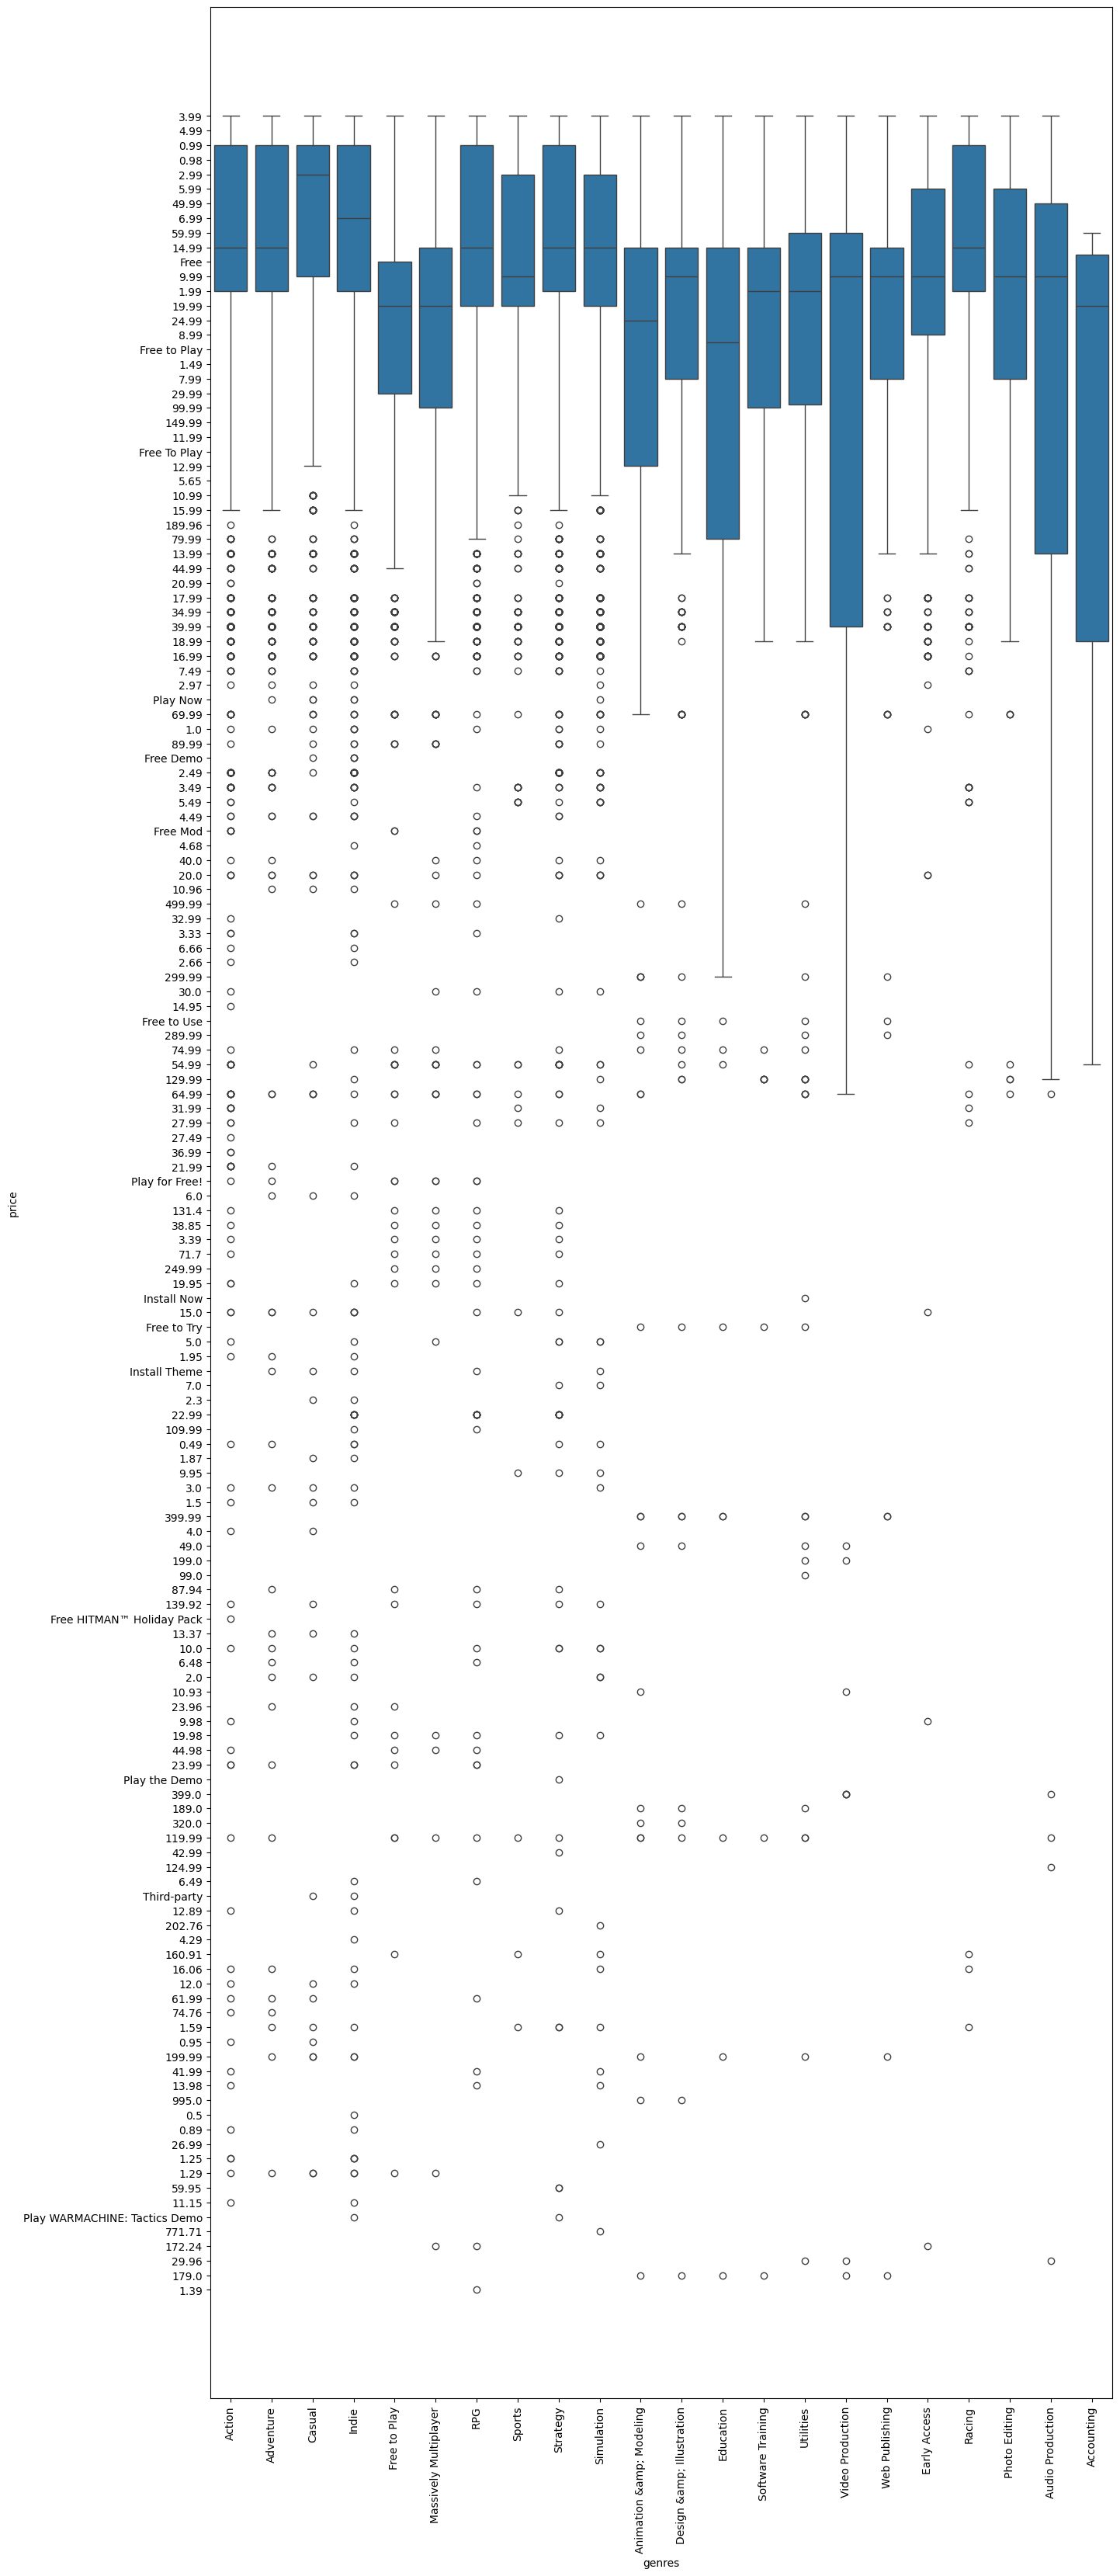

In [32]:
plt.figure(figsize=(15,40))
sns.boxplot(x='genres', y='price', data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# Connclucion  para poder analizar el precio hay que convertir a numerico y poner en 0 los free
# en caso de ser necesario hay que hacerlo


In [39]:
# Analizao Items
df_items=pd.read_csv("df_items1.csv")

In [59]:
df_items

,item_id,item_name,playtime_forever,playtime_2weeks,user_id
0,10,Counter-Strike,6,0,76561197970982479
1,10,Counter-Strike,14,0,sprayandpray168543483
2,10,Counter-Strike,12,0,BlazingTheAmazing
3,10,Counter-Strike,10,0,WolfOfCSGOL
4,10,Counter-Strike,259,0,InstigatorAU
...,...,...,...,...,...
5153141,99920,Spiral Knights Preview,0,0,extronic
5153142,99920,Spiral Knights Preview,0,0,DownSyndromeKid
5153143,99920,Spiral Knights Preview,0,0,adi_a12
5153144,99920,Spiral Knights Preview,0,0,jiffyjoker89


In [70]:
df_items=df_items.dropna(how='all')

In [77]:
df_items['playtime_2weeks'].isna().value_counts()

playtime_2weeks
False    5153146
Name: count, dtype: int64

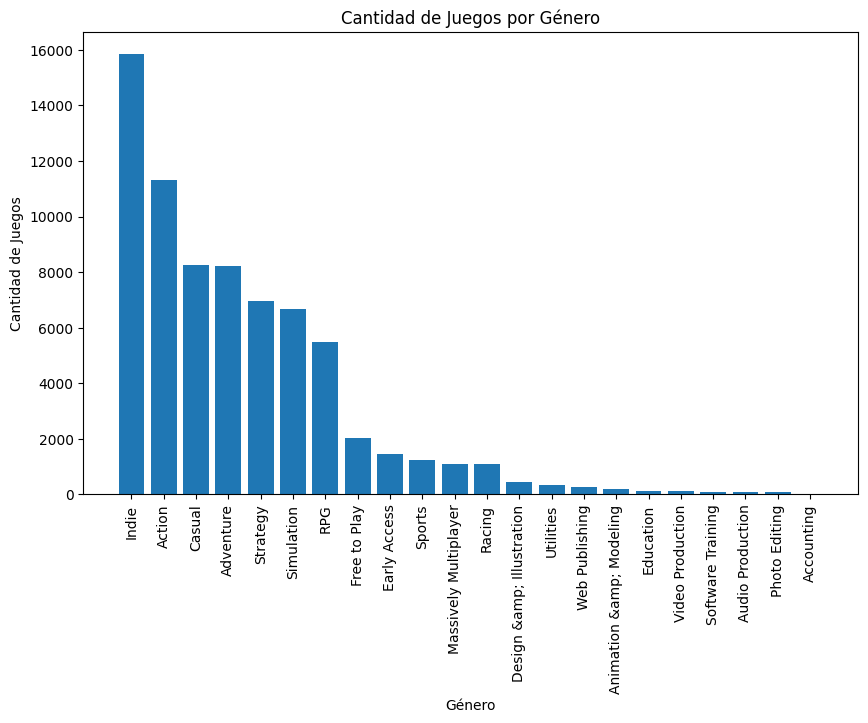

In [42]:
df = df_games[['item_id', 'item_name', 'user_id']]
# Contar la cantidad de juegos por género
genre_counts = df['genres'].value_counts()

# Ordenar los géneros por la cantidad de juegos
genre_counts = genre_counts.sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Establece el tamaño del gráfico
plt.bar(genre_counts.index, genre_counts.values)

# Añadir etiquetas y título
plt.xlabel('Género')
plt.ylabel('Cantidad de Juegos')
plt.title('Cantidad de Juegos por Género')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=90)

# Mostrar el gráfico de barras
plt.show()



In [50]:
df_ur=pd.read_csv('user_reviews.csv')

In [51]:
df_ur

,item_id,recommend,user_id,sentiment_analysis
0,1250.0,True,76561197970982479,2
1,22200.0,True,76561197970982479,2
2,43110.0,True,76561197970982479,2
3,251610.0,True,js41637,0
4,227300.0,True,js41637,0
...,...,...,...,...
59328,70.0,True,76561198312638244,2
59329,362890.0,True,76561198312638244,2
59330,273110.0,True,LydiaMorley,2
59331,730.0,True,LydiaMorley,2


In [ ]:
# DataFrame llamado df_ur con las columnas 'item_id' y 'sentiment_analysis'


# Contar la cantidad de item_id para cada valor de sentiment_analysis
sentiment_counts = df_ur['sentiment_analysis'].value_counts()

# Crear un diccionario para mapear los valores de sentiment_analysis a su descripción
sentiment_map = {0: 'Sentiment 0', 1: 'Sentiment 1', 2: 'Sentiment 2'}

# Inicializar un diccionario para almacenar el recuento por descripción
counts_by_sentiment = {}

# Iterar a través de los valores de sentiment_analysis y obtener el recuento
for sentiment_value, count in sentiment_counts.items():
    sentiment_description = sentiment_map.get(sentiment_value, f'Sentiment {sentiment_value}')
    counts_by_sentiment[sentiment_description] = count

# Imprimir los recuentos por descripción
for sentiment_description, count in counts_by_sentiment.items():
    print(f'{sentiment_description}: {count} item_id')


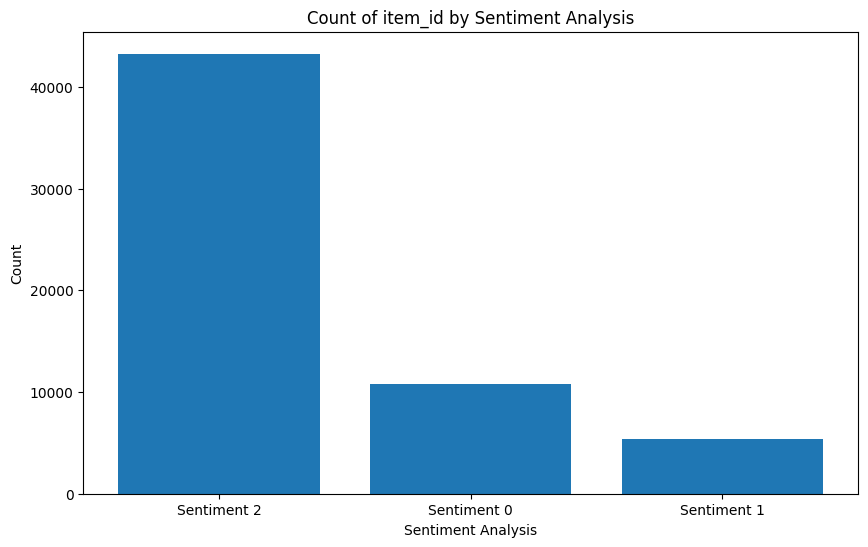

In [56]:
import matplotlib.pyplot as plt

# El diccionario counts_by_sentiment contiene los recuentos por descripción
# Por ejemplo: {'Sentiment 0': 10, 'Sentiment 1': 20, 'Sentiment 2': 5}

# Obtén las descripciones y recuentos del diccionario
sentiment_descriptions = list(counts_by_sentiment.keys())
counts = list(counts_by_sentiment.values())

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))  # Establece el tamaño del gráfico
plt.bar(sentiment_descriptions, counts)

# Añade etiquetas y título
plt.xlabel('Sentiment Analysis')
plt.ylabel('Count')
plt.title('Count of item_id by Sentiment Analysis')

# Muestra el gráfico de barras
plt.show()


In [63]:
#borro los que sean todos nulos
df_ur.dropna(how="all",inplace=True)